Notebook on how to benchmark a model against the datasets

In [1]:
from data_utils import unnormalize_image, visualize_image, visualize_image_with_bboxes
from segmentation_dataset import COCOSegmentationDataset
from object_detection_dataset import COCOObjectDetectionDataset

import os
from torch.utils.data import DataLoader
from torchvision import transforms
import torch

First let's try to load the segmentation dataset

In [2]:
data_dir = 'data/20250507_NORD_FKB_Som_Korrigert'
ann_file = os.path.join(data_dir, 'coco_dataset_with_segmentation.json')

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = COCOSegmentationDataset(data_dir, ann_file, transform=transform)

# Create a dataloader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2)


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


Now we can iterate through the dataloader and get the data

torch.Size([4, 3, 512, 512]) torch.Size([4, 512, 512])
image min: tensor(-1.9832) image max: tensor(2.2043)
mask min: tensor(0) mask max: tensor(250)


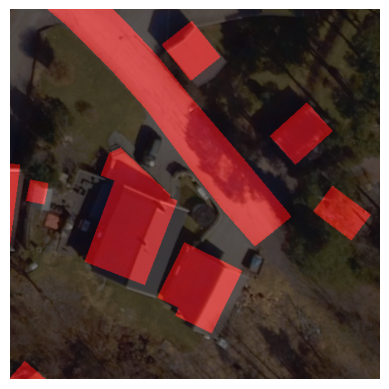

In [3]:
for sample in dataloader:
    image, mask = sample
    print(image.shape, mask.shape)
    print("image min:", image.min(), "image max:", image.max())
    print("mask min:", mask.min(), "mask max:", mask.max())
    visualize_image(image[0], mask[0])  #Visualize the first image and mask in the batch
    break


Now for creating the object detection dataset

In [ ]:
data_dir = 'data/20250507_NORD_FKB_Som_Korrigert'
ann_file = os.path.join(data_dir, 'coco_dataset_with_segmentation.json')

def collate_fn(batch):
    images, targets = zip(*batch)
    return torch.stack(images), targets

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = COCOObjectDetectionDataset(data_dir, ann_file, transform=transform)

# Create a dataloader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2, collate_fn=collate_fn)


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


Now we can iterate through the dataloader and get the data


torch.Size([4, 3, 512, 512])
image min: tensor(-2.0152) image max: tensor(2.0997)


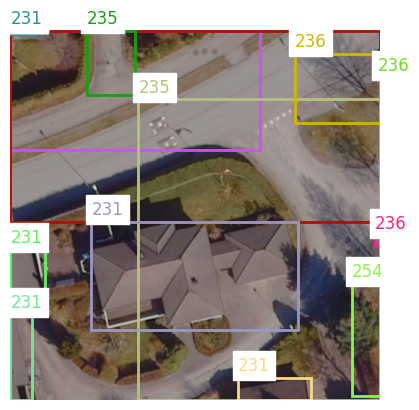

In [5]:
for sample in dataloader:
    image, bboxes_and_labels = sample
    print(image.shape)
    print("image min:", image.min(), "image max:", image.max())
    bbox_and_label = bboxes_and_labels[0]
    visualize_image_with_bboxes(image[0], {'boxes': bboxes_and_labels[0]["boxes"], 'labels': bboxes_and_labels[0]["labels"]})
    break

In [6]:
from evaluate import evaluate_coco
from dummy_model import DummyObjectDetectionModel

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

coco_gt = dataset.coco
model = DummyObjectDetectionModel(num_classes=len(coco_gt.getCatIds()))

evaluate_coco(dataloader, model, coco_gt, device)

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.68s).
Accumulating evaluation results...
DONE (t=0.13s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

In [7]:
from evaluate import evaluate_coco_segmentation
from dummy_segmentation_model import DummySegmentationModel

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = DummySegmentationModel(num_classes=len(coco_gt.getCatIds()), image_size=256)

evaluate_coco_segmentation(dataloader, model, coco_gt, device)

creating index...
index created!

Debug: Checking first few annotations:

Annotation 0:
Keys in annotation: dict_keys(['id', 'image_id', 'category_id', 'bbox', 'iscrowd', 'area', 'ignore', '_ignore'])

Annotation 1:
Keys in annotation: dict_keys(['id', 'image_id', 'category_id', 'bbox', 'iscrowd', 'area', 'ignore', '_ignore'])

Annotation 2:
Keys in annotation: dict_keys(['id', 'image_id', 'category_id', 'bbox', 'iscrowd', 'area', 'ignore', '_ignore'])

Annotation 3:
Keys in annotation: dict_keys(['id', 'image_id', 'category_id', 'bbox', 'iscrowd', 'area', 'ignore', '_ignore'])

Annotation 4:
Keys in annotation: dict_keys(['id', 'image_id', 'category_id', 'bbox', 'iscrowd', 'area', 'ignore', '_ignore'])
creating index...
index created!

Segmentation Evaluation Statistics:
Total annotations: 8577
Annotations with segmentation: 0 (0.0%)
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (A